In [1]:
# project: p9
# submitter: wxia9
# partner: none
import os, json, csv
from collections import namedtuple
import pandas as pd
import matplotlib, pandas

In [2]:
def openJSON(filename, flag):
    if flag:
        f = open(filename, encoding="utf-8")
    else:
        f = open(os.path.join('data',filename), encoding="utf-8")
    json_str = f.read()
    f.close()
    data = json.loads(json_str)
    return data

In [3]:
def openCSV(filename):
    exampleFile = open(os.path.join("data",filename), encoding="utf-8")
    exampleReader = csv.reader(exampleFile)
    exampleData = list(exampleReader)
    exampleFile.close()
    return exampleData

In [4]:
def get_reviews(csvfile, JSONfile):
    csv = openCSV(csvfile)
    JSON = openJSON(JSONfile, False)
    csv = csv[1:]
    Review = namedtuple("Review", ["id", "username", "asin", "title", "text", "rating", 
                                       "do_recommend", "num_helpful", "date"])
    result = []
    for i in range(len(csv)):
        try:
            username = JSON[csv[i][0]][0]
            asin = JSON[csv[i][0]][1]
            id = int(csv[i][0])
            title = csv[i][1]
            text = csv[i][2]
            rating = int(csv[i][3])
            do_recommend = eval(csv[i][4])
            num_helpful = int(csv[i][5])
            date = csv[i][6]
            result.append(Review(id, username, asin, title, text, rating, do_recommend, num_helpful, date))
        except (ValueError, KeyError) as e:
            continue
        except (IndexError) as k:
            continue
    return result

In [5]:

#q1
receiver = os.listdir("data")
sorted(receiver, reverse=True)

['sample_reviews.json',
 'sample_reviews.csv',
 'review5.json',
 'review5.csv',
 'review4.json',
 'review4.csv',
 'review3.json',
 'review3.csv',
 'review2.json',
 'review2.csv',
 'review1.json',
 'review1.csv',
 'products.json']

In [6]:
#q2
AllPath = list()
for i in range(len(receiver)):
    path = receiver[i]
    AllPath.append(os.path.join('data', path))
sorted(AllPath, reverse=True)

['data\\sample_reviews.json',
 'data\\sample_reviews.csv',
 'data\\review5.json',
 'data\\review5.csv',
 'data\\review4.json',
 'data\\review4.csv',
 'data\\review3.json',
 'data\\review3.csv',
 'data\\review2.json',
 'data\\review2.csv',
 'data\\review1.json',
 'data\\review1.csv',
 'data\\products.json']

In [7]:
#q3
AllPath = list()
for i in range(len(receiver)):
    path = receiver[i]
    if path[-4:] == '.csv':
        AllPath.append(os.path.join("data", path))
reviews = sorted(AllPath, reverse=True)
reviews

['data\\sample_reviews.csv',
 'data\\review5.csv',
 'data\\review4.csv',
 'data\\review3.csv',
 'data\\review2.csv',
 'data\\review1.csv']

In [8]:
#q4
AllPath = list()
for i in range(len(receiver)):
    path = receiver[i]
    if path[0:6] == 'review':
        AllPath.append(os.path.join("data", path))
sorted(AllPath, reverse=True)

['data\\review5.json',
 'data\\review5.csv',
 'data\\review4.json',
 'data\\review4.csv',
 'data\\review3.json',
 'data\\review3.csv',
 'data\\review2.json',
 'data\\review2.csv',
 'data\\review1.json',
 'data\\review1.csv']

In [9]:
#q5
JSON = openJSON('products.json', False)
JSON

{'B00QFQRELG': 'Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders',
 'B01BH83OOM': 'Amazon Tap Smart Assistant Alexa enabled (black) Brand New',
 'B00ZV9PXP2': 'All-New Kindle E-reader - Black, 6" Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers',
 'B0751RGYJV': 'Amazon Echo (2nd Generation) Smart Assistant Oak Finish Priority Shipping',
 'B00IOY8XWQ': 'Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers',
 'B0752151W6': 'All-new Echo (2nd Generation) with improved sound, powered by Dolby, and a new design Walnut Finish',
 'B018Y226XO': 'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Pink Kid-Proof Case',
 'B01ACEKAJY': 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Black',
 'B01AHB9CYG': 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Magenta',
 'B01AHB9CN2': 'All

In [10]:
#q6
review1 = openCSV("review1.csv")
header = review1[0]
review1 = review1[1:]
result = None
count = 0
for i in range(len(header)):
    if header[i] == "review text":
        count = i;
        break;
for i in range(len(review1)):
    if review1[i][0] == '1410':
        result = review1[i][count]
        break;
result

'It does what it is suppose to. No problems with it...'

In [11]:
#q7
result = None
for i in range(len(reviews)):
    review = openCSV(reviews[i][5:])
    for j in range(len(review)):
        if review[j][0] == '69899':
            result = review[j][count]
            break
result

'I hate amazon app store. Nothing good in there. The tablet is too slow for what I do... it is good for reading only....'

In [12]:
#q8
flag = 0;
for i in range(len(header)):
    if header[i] == "review title":
        count = i;
        break;
result = None
for i in range(len(reviews)):
    review = openCSV(reviews[i][5:])
    for j in range(len(review)):
        if review[j][0] == '28013':
            result = review[j][count]
            flag = 1;
            break
    if flag == 1:
        break
result

'Perfection'

In [13]:
#q9
reviews[i][5:]

'review3.csv'

In [14]:
#q10
sample = openJSON('sample_reviews.json', False)
sample

{'10101': ['Mikey123456789', 'B00QFQRELG'],
 '99904': ['diamond', 'B00QFQRELG'],
 '89604': ['Pat91', 'B00QFQRELG'],
 '58704': ['Frank', 'B00QFQRELG'],
 '38104': ['LADYD92', 'B00QFQRELG']}

In [15]:
#q11
get_reviews('sample_reviews.csv', 'sample_reviews.json')

[Review(id=10101, username='Mikey123456789', asin='B00QFQRELG', title='A charger', text='It seems to work just like any other usb plug in charger.', rating=5, do_recommend=True, num_helpful=0, date='2017-01-02'),
 Review(id=99904, username='diamond', asin='B00QFQRELG', title='amazon power fast usb charger', text='got this for my kindle 7 tablet . Does an excellent job charging the kindle fire 7 a lot faster than the one it came with the kindle fire', rating=5, do_recommend=True, num_helpful=2, date='2016-06-03'),
 Review(id=89604, username='Pat91', asin='B00QFQRELG', title='Amazon powerfast wall charger', text='Best kindle charger ever. Took 30 minutes to being my kindle back to life.', rating=5, do_recommend=True, num_helpful=0, date='2016-11-21'),
 Review(id=58704, username='Frank', asin='B00QFQRELG', title='correct plug for kindle', text='Quickly charges kindle so son can use it. Worked great right out of the package', rating=5, do_recommend=True, num_helpful=0, date='2016-10-14'),


In [16]:
#q12
get_reviews('review1.csv', 'review1.json')[0:10]

[Review(id=10101, username='Mikey123456789', asin='B00QFQRELG', title='A charger', text='It seems to work just like any other usb plug in charger.', rating=5, do_recommend=True, num_helpful=0, date='2017-01-02'),
 Review(id=99904, username='diamond', asin='B00QFQRELG', title='amazon power fast usb charger', text='got this for my kindle 7 tablet . Does an excellent job charging the kindle fire 7 a lot faster than the one it came with the kindle fire', rating=5, do_recommend=True, num_helpful=2, date='2016-06-03'),
 Review(id=89604, username='Pat91', asin='B00QFQRELG', title='Amazon powerfast wall charger', text='Best kindle charger ever. Took 30 minutes to being my kindle back to life.', rating=5, do_recommend=True, num_helpful=0, date='2016-11-21'),
 Review(id=58704, username='Frank', asin='B00QFQRELG', title='correct plug for kindle', text='Quickly charges kindle so son can use it. Worked great right out of the package', rating=5, do_recommend=True, num_helpful=0, date='2016-10-14'),


In [17]:
#q13
get_reviews('review2.csv', 'review2.json')[-10:]

[Review(id=25136, username='Angrydagg', asin='B018Y229OU', title='Nice features for the price.', text='For the price this tables does everything I need. so far.', rating=4, do_recommend=True, num_helpful=0, date='2015-12-30'),
 Review(id=84039, username='Appman2015', asin='B018Y229OU', title='Great for xmas', text='So far I have bought three of these of tablets and they love it', rating=4, do_recommend=True, num_helpful=1, date='2015-12-30'),
 Review(id=22239, username='SuzieQ', asin='B018Y229OU', title='great for pre teens', text='i am glad i got them for my grand children they r enjoying them', rating=5, do_recommend=True, num_helpful=0, date='2015-12-31'),
 Review(id=70842, username='Gracie', asin='B018Y229OU', title='Great kindle', text='Purchase was good. Very easy to set up and use. Clear screen. Easy to charge. Would like more storage.', rating=5, do_recommend=True, num_helpful=0, date='2015-12-31'),
 Review(id=60542, username='Jeremyjeepster', asin='B018Y229OU', title='Good ent

In [18]:
#q14
allreviews = []
for i in range(1, 6):
    csvname = 'review' + str(i) + '.csv'
    jsonname = 'review' + str(i) +'.json'
    try:
        review = get_reviews(csvname, jsonname)
    except (ValueError) as e:
        continue
    for j in range(len(review)):
        allreviews.append(review[j])
for i in range(len(allreviews)):
    if allreviews[i].id == 84713:
        break
allreviews[i]

Review(id=84713, username='mmolly1', asin='B01AHB9CN2', title='Great product', text='This product is very user friendly and it is very lightweight', rating=5, do_recommend=True, num_helpful=0, date='2017-01-08')

In [19]:
#q15
for i in range(len(allreviews)):
    if allreviews[i].id == 42931:
        break
allreviews[i]

Review(id=42931, username='tbistone', asin='B01BH83OOM', title='Amazing', text='I literally use this thing every single day. Love it.', rating=5, do_recommend=True, num_helpful=0, date='2016-12-20')

In [20]:
#q16
allreviews.sort(key=lambda x:x.id)
allreviews[0:10]

[Review(id=74, username='Wayne', asin='B01AHB9CN2', title='Kindle upgrade', text='Gave this to my wife for Christmas. Upgraded from the original Kindle. She thoroughly enjoys it.', rating=5, do_recommend=True, num_helpful=0, date='2016-12-31'),
 Review(id=82, username='KKLORRAINE', asin='B01AHB9CN2', title='Good', text='Great for reading and Netflix. Fits nice in purse. Good price.', rating=4, do_recommend=True, num_helpful=0, date='2017-04-07'),
 Review(id=110, username='nell', asin='B00IOY8XWQ', title='I love it', text='Prefect for all reading conditions and environments. I take it everywhere.', rating=5, do_recommend=True, num_helpful=0, date='2016-07-09'),
 Review(id=122, username='apple21man', asin='B01BH83OOM', title='A great assistant', text='It works well it takes time for it to know your vocabulary', rating=5, do_recommend=True, num_helpful=0, date='2017-01-23'),
 Review(id=247, username='rockydon1', asin='B018Y229OU', title='great', text='The Kindle fire is a great product. W

In [21]:
def get_key(product, name):
    for key in product:
        if product[key] == name:
            return key

In [22]:
#q17
product = openJSON('products.json', False)
receiver = get_key(product, 'Amazon Tap Smart Assistant Alexa enabled (black) Brand New')
count = 0
for i in range(len(allreviews)):
    if allreviews[i].asin == receiver:
        count += 1
count

165

In [23]:
#q18
count = 0
receiver = get_key(product,  "All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Black")
for i in range(len(allreviews)):
    if allreviews[i].asin == receiver:
        count += 1
count

12

In [24]:
#q19
highest = 0
count = 0
result = None
for key in product:
    count = 0
    for i in range(len(allreviews)):
        if allreviews[i].asin == key:
            count += 1
    if count > highest:
        result = key
        highest = count
product[result]

'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta'

In [25]:
#q20
highest = 0
results = None
for i in range(len(allreviews)):
    if allreviews[i].asin == result:
        if highest < allreviews[i].num_helpful:
            highest = allreviews[i].num_helpful
for i in range(len(allreviews)):
    if allreviews[i].asin == result and allreviews[i].num_helpful == highest:
        results = allreviews[i]
results

Review(id=85969, username='Beninkc', asin='B018Y229OU', title='5 star device crippled by amazon', text='This device would be the best possible tablet for the money if it had Google Play. However Amazon chose to block access to it. This took their well made tablet with a beautiful screen and great performance from an amazing value to a waste of money. This is my last amazon branded product.If you use a lot of apps or want specific apps shop for another device.', rating=1, do_recommend=False, num_helpful=20, date='2016-02-14')

In [26]:
#q21
unique = []
for i in range(len(allreviews)):
    if not allreviews[i].username in unique:
        unique.append(allreviews[i].username)
len(unique)

3798

In [27]:
#q22
count = 0
useful = 0;
usermap = dict()
usefulmap = dict()
for i in range(len(unique)):
    count = 0
    useful = 0
    for j in range(len(allreviews)):
        if allreviews[j].username == unique[i]:
            useful += allreviews[j].num_helpful
            count += 1
    usermap[unique[i]] = count
    usefulmap[unique[i]] = useful
top30 = sorted(usermap, key=usermap.get, reverse=True)[0:30]
result = dict()
for i in range(len(top30)):
    result[top30[i]] = usermap[top30[i]]
result

{'Dave': 5,
 'Steve': 4,
 'Mike': 4,
 '1234': 4,
 'Susan': 4,
 'Angie': 4,
 'Chris': 4,
 'Missy': 4,
 'Pete': 3,
 'Anonymous': 3,
 'Josh': 3,
 'Charles': 3,
 'Rick': 3,
 'Dani': 3,
 'mike': 3,
 'Bill': 3,
 'John': 3,
 'Jojo': 3,
 'Kindle': 3,
 'Bubba': 3,
 'kcladyz': 3,
 'Frank': 3,
 'Grandma': 3,
 'Mimi': 3,
 'Richard': 3,
 'Manny': 3,
 'Susie': 3,
 'Charlie': 3,
 'Michael': 3,
 'David': 3}

In [28]:
#q23
result = dict()
for key in usefulmap:
    if usefulmap[key] >= 5:
        result[key] = usefulmap[key]
result

{'Ellen': 10,
 'Earthdog': 27,
 'fenton': 6,
 'Dick': 5,
 'Junior': 7,
 'AshT': 5,
 'Stuartc': 8,
 'safissad': 8,
 'iMax': 5,
 'trouble': 5,
 'Roberto002007': 7,
 'EricO': 7,
 'stephfasc22': 5,
 'LadyEsco702': 8,
 'Karch': 5,
 'TerrieT': 5,
 'mysixpack': 6,
 'Mark': 5,
 'Rodge': 6,
 'Deejay': 8,
 'FrankW': 5,
 'Beninkc': 20,
 'CarlosEA': 10,
 '1Briansapp': 5,
 'Quasimodo': 5,
 'Kime': 5}

In [29]:
#q24
count = 0
total = 0
avgrating = dict()
procount = dict()
for key in product:
    count = 0
    total = 0
    for i in range(len(allreviews)):
        if key == allreviews[i].asin:
            count += 1
            total += allreviews[i].rating
    procount[product[key]] = count
    avgrating[product[key]] = total/count
avgrating

{'Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders': 4.7272727272727275,
 'Amazon Tap Smart Assistant Alexa enabled (black) Brand New': 4.6909090909090905,
 'All-New Kindle E-reader - Black, 6" Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers': 4.590163934426229,
 'Amazon Echo (2nd Generation) Smart Assistant Oak Finish Priority Shipping': 5.0,
 'Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers': 4.666666666666667,
 'All-new Echo (2nd Generation) with improved sound, powered by Dolby, and a new design Walnut Finish': 5.0,
 'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Pink Kid-Proof Case': 4.603448275862069,
 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Black': 4.583333333333333,
 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Magenta': 4.574468085106383,


In [30]:
#copied from: https://github.com/tylerharter/cs301-projects/tree/master/fall19/lab-p9b
def scatter(x, y, xlabel="Number of reviews", ylabel="Average rating"):
    df = pd.DataFrame({"x":x, "y":y})
    ax = df.plot.scatter(x="x", y="y", color="black", fontsize=16, xlim=0, ylim=0)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.get_xaxis().get_major_formatter().set_scientific(False)
    ax.get_yaxis().get_major_formatter().set_scientific(False)

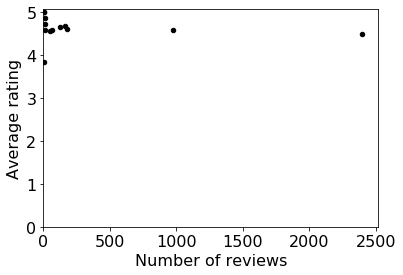

In [31]:
#q25
rating = []
rwcount = []
for key in avgrating:
    rating.append(avgrating[key])
    rwcount.append(procount[key])
%matplotlib inline
scatter(rwcount, rating)

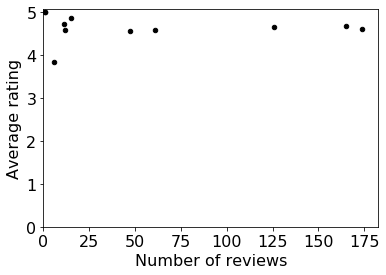

In [32]:
#q26
modifiedrw = []
modifiedrating = []
for i in range(len(rwcount)):
    if rwcount[i] < 500:
        modifiedrw.append(rwcount[i])
        modifiedrating.append(rating[i])
scatter(modifiedrw, modifiedrating)

In [33]:
def bucket(bucket):
    result = dict()
    for i in range(6):
        result[i] = []
    for i in range(len(bucket)):
        result[bucket[i].rating].append(bucket[i])
    return result

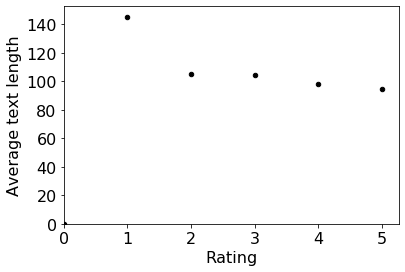

In [34]:
#q27
receiver = bucket(allreviews)
total = 0
avglength = []
mapper = dict()
for key in receiver:
    total = 0
    for i in range(len(receiver[key])):
        total += len(receiver[key][i].text)
    if len(receiver[key]) == 0:
        mapper[key] = 0
    else:
        mapper[key] = total/len(receiver[key])
for key in mapper:
    avglength.append(mapper[key])
scatter(list(mapper), avglength, xlabel = 'Rating', ylabel = 'Average text length')

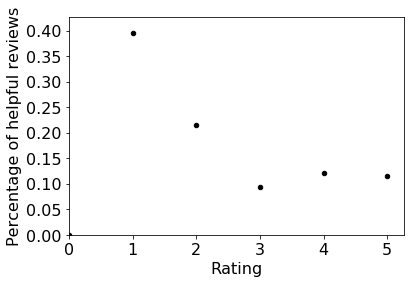

In [35]:
#q28
helpful = []
count = 0
helpfulmapper = dict()
for key in receiver:
    count = 0
    for i in range(len(receiver[key])):
        if receiver[key][i].num_helpful > 0 :
            count += 1
    if len(receiver[key]) == 0:
        helpfulmapper[key] = 0
    else:
        helpfulmapper[key] = count/len(receiver[key])
for key in helpfulmapper:
    helpful.append(helpfulmapper[key])
scatter(list(helpfulmapper), helpful, xlabel = 'Rating', ylabel = 'Percentage of helpful reviews')

In [36]:
#q29
total = 0
count = 0
for i in range(len(allreviews)):
    if allreviews[i].do_recommend:
        total += allreviews[i].rating
        count += 1
total/count

4.607549120992761

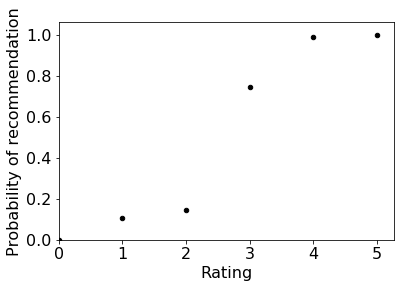

In [37]:
#q30
possibility = []
count = 0
possmapper = dict()
for key in receiver:
    count = 0
    for i in range(len(receiver[key])):
        if receiver[key][i].do_recommend :
            count += 1
    if len(receiver[key]) == 0:
        possmapper[key] = 0
    else:
        possmapper[key] = count/len(receiver[key])
for key in possmapper:
    possibility.append(possmapper[key])
scatter(list(possmapper), possibility, xlabel = 'Rating', ylabel = 'Probability of recommendation')

In [38]:
#q31
wordmap = dict()
for i in range(len(receiver[5])):
    getter = receiver[5][i].text.lower().split(" ")
    for i in range(len(getter)):
        if getter[i] in wordmap:
            wordmap[getter[i]] += 1
        else:
            wordmap[getter[i]] = 1
modifiedword = dict()
for key in wordmap:
    if wordmap[key] > 1000:
        modifiedword[key] = wordmap[key]
modifiedword

{'this': 1016,
 'to': 1442,
 'my': 1146,
 'for': 1800,
 'the': 1740,
 'and': 1818,
 'i': 1317,
 'it': 1286,
 'a': 1134}

In [39]:
#q32
titlemap = dict()
for i in range(len(receiver[5])):
    getter = receiver[5][i].title.lower().split(" ")
    for i in range(len(getter)):
        if getter[i] in titlemap:
            titlemap[getter[i]] += 1
        else:
            titlemap[getter[i]] = 1
modifiedtitle = dict()
for key in titlemap:
    if titlemap[key] > 100:
        modifiedtitle[key] = titlemap[key]
modifiedtitle

{'kindle': 142,
 'love': 158,
 'it': 137,
 'a': 143,
 'great': 1093,
 'the': 231,
 'tablet': 681,
 'good': 212,
 'for': 617,
 'awesome': 108,
 'kids': 132,
 'gift': 105,
 'fire': 104,
 'price': 149,
 'product': 179,
 'my': 138,
 'to': 106}

In [40]:
#q33
titlemap = dict()
for i in range(len(receiver[1])):
    getter = receiver[1][i].title.lower().split(" ")
    for i in range(len(getter)):
        if getter[i] in titlemap:
            titlemap[getter[i]] += 1
        else:
            titlemap[getter[i]] = 1
modifiedtitle = dict()
for key in titlemap:
    if titlemap[key] > 1:
        modifiedtitle[key] = titlemap[key]
modifiedtitle

{'poor': 2,
 'tablet': 4,
 'a': 5,
 'great': 2,
 'very': 3,
 'disappointed': 2,
 'use': 2,
 'amazon': 5,
 'not': 8,
 'good': 2,
 '5': 2,
 'for': 2,
 'with': 2,
 'work': 2,
 'really': 2,
 'to': 2,
 'and': 2,
 'kindle': 2,
 'does': 2}

In [41]:
#q34
titlemap = dict()
for i in range(len(receiver[3])):
    getter = receiver[3][i].title.lower().split(" ")
    for i in range(len(getter)):
        if getter[i] in titlemap:
            titlemap[getter[i]] += 1
        else:
            titlemap[getter[i]] = 1
modifiedtitle = dict()
for key in titlemap:
    if titlemap[key] > 10:
        modifiedtitle[key] = titlemap[key]
modifiedtitle

{'great': 37,
 'for': 60,
 'price': 18,
 'ok': 18,
 'tablet': 51,
 'the': 18,
 'good': 42,
 'not': 13,
 'a': 17}

In [42]:
def get_paths(currentdir, target, result):
    receiver = os.listdir(currentdir)
    for i in range(len(receiver)):
        if receiver[i] == target:
            result.append(os.path.join(currentdir, target))
            return result
        else:
            if os.path.isdir(os.path.join(currentdir,receiver[i])):
                result = get_paths(os.path.join(currentdir,receiver[i]), target, result)
    return result

In [43]:
#q35
result = []
result = get_paths("broken_file", "helpful.json", result)
sorted(result, reverse=True)

['broken_file\\rating5\\helpful\\helpful.json']

In [44]:
def get_allpaths(currentdir, target, result, flag):
    receiver = os.listdir(currentdir)
    for i in range(len(receiver)):
        if receiver[i] == target or flag:
            if os.path.isdir(os.path.join(currentdir,receiver[i])):
                result = get_allpaths(os.path.join(currentdir,receiver[i]), target, result, True)
        if flag and os.path.isfile(os.path.join(currentdir,receiver[i])):
            result.append(os.path.join(currentdir,receiver[i]))
    return result

In [45]:
#q36
result = []
result = get_allpaths("broken_file", "rating4", result, False)
sorted(result, reverse=True)

['broken_file\\rating4\\very_helpful\\very_helpful.json',
 'broken_file\\rating4\\others\\short\\short.json',
 'broken_file\\rating4\\others\\others\\others.json',
 'broken_file\\rating4\\not_helpful.json']

In [46]:
#q37
result = []
result = get_allpaths("broken_file", "broken_file", result, True)
sorted(result, reverse=True)

['broken_file\\rating5\\others.json',
 'broken_file\\rating5\\helpful\\helpful.json',
 'broken_file\\rating4\\very_helpful\\very_helpful.json',
 'broken_file\\rating4\\others\\short\\short.json',
 'broken_file\\rating4\\others\\others\\others.json',
 'broken_file\\rating4\\not_helpful.json',
 'broken_file\\rating3\\others\\others.json',
 'broken_file\\rating3\\long\\long.json',
 'broken_file\\others.json']

In [47]:
#q38
allcombined = dict()
newdict = dict()
for i in range(len(result)):
    intermediate = openJSON(result[i], True)
    for key in intermediate:
        allcombined[key] = intermediate[key]
for key in allcombined:
    newdict[allcombined[key][1]] = 1
len(newdict)

1

In [48]:
with open(os.path.join('data','broken_data.json'), 'w') as f:
    json.dump(allcombined, f)

In [49]:
#q39
newreviews = []
for i in range(1, 6):
    csvname = 'review' + str(i) + '.csv'
    jsonname = 'review' + str(i) +'.json'
    if i == 4:
        jsonname = 'broken_data.json'
    review = get_reviews(csvname, jsonname)
    for j in range(len(review)):
        newreviews.append(review[j])
os.remove(os.path.join('data','broken_data.json'))
len(newreviews)

4992

In [50]:
#q40
oldrating = 0
newrating = 0
count = 0
for i in range(len(allreviews)):
    if product[allreviews[i].asin] ==  'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta':
        oldrating += allreviews[i].rating
        count += 1
oldrating = oldrating/count
count = 0
for i in range(len(newreviews)):
    if product[newreviews[i].asin] ==  'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta':
        newrating += newreviews[i].rating
        count += 1
newrating = newrating/count
((newrating - oldrating)/oldrating)*100

0.31190229022053717